# practice 4. Logistic Regression 

데이터 셋 링크: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv  
참고자료: https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial

이 데이터 집합에는 호주 전역의 여러 위치에서 약 10년간의 일일 기상 관측 데이터가 포함되어 있습니다. 내일 비가 올지 여부를 나타낸 RainTomorrow 여부를 예측하는 logistic regression 모델을 학습시키고, 성능을 측정하고, 결과를 해석해보세요.

- Date : 날짜
- Location : 위치
- MinTemp : 최저기온
- MaxTemp : 최고기온
- Rainfall : 강수량
- Evaporation : 증발
- Shnshine : 하루 동안 해가 떠있는 시간
- WindGustDir : 풍향
- WindGustSpped : 풍속
- WindDir9am : 오전 9시 풍향
- WindDir3pm : 오후 3시 풍향
- WindSpeed9am : 오전 9시 풍속
- WindSpeed3pm : 오후 3시 풍속
- Humidity9am : 오전 9시 습도
- Humidity3pm : 오후 3시 습도
- Pressure9am : 오전 9시 해수면 기압
- Pressure3pm : 오후 3시 해수면 기압
- Cloud9am : 오전 9시 구름
- Cloud3pm : 오후 3시 구름
- Temp9am : 오전 9시 기온
- Temp3pm : 오후 3시 기온
- RainToday : 당일 강수 여부

In [86]:
from utils import load_weather_dataset
import pandas as pd

x_train, x_test, y_train, y_test = load_weather_dataset()

In [91]:
x_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
92882,2016-05-24,GoldCoast,17.7,25.3,0.0,NaN,NaN,SSE,43.0,S,...,24.0,41.0,40.0,1017.6,1015.2,NaN,NaN,23.5,23.2,No
98353,2014-04-23,Adelaide,8.1,20.9,0.0,3.6,9.2,WNW,22.0,NaN,...,9.0,63.0,34.0,1018.8,1014.9,NaN,NaN,14.6,20.1,No
49669,2010-09-08,Tuggeranong,-0.7,14.2,0.0,NaN,NaN,N,33.0,NNE,...,11.0,65.0,40.0,1027.4,1022.6,NaN,NaN,7.6,13.5,No
113818,2015-04-16,Witchcliffe,6.4,20.1,0.0,NaN,NaN,SE,28.0,NaN,...,19.0,72.0,52.0,1033.5,1029.5,NaN,NaN,15.0,19.8,No
50325,2012-07-26,Tuggeranong,2.4,11.9,3.0,NaN,NaN,N,22.0,NNW,...,2.0,85.0,79.0,1015.1,1011.3,NaN,NaN,9.2,10.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41239,2013-11-26,Williamtown,13.9,22.8,5.0,5.2,7.9,SSE,48.0,WSW,...,33.0,52.0,45.0,1015.8,1016.0,6.0,2.0,18.9,21.7,Yes
55985,2011-06-02,Ballarat,3.3,14.7,0.0,NaN,NaN,N,46.0,NNE,...,30.0,84.0,70.0,1026.4,1022.0,2.0,NaN,10.1,13.7,No
32399,2014-06-01,Sydney,14.8,20.7,11.2,5.0,0.4,W,46.0,NW,...,26.0,87.0,70.0,1020.5,1018.0,7.0,8.0,17.0,17.8,Yes
82584,2013-08-03,Dartmoor,5.0,13.5,2.2,1.4,4.8,WNW,61.0,N,...,20.0,95.0,79.0,1009.9,1006.5,NaN,NaN,9.4,13.4,Yes


In [ ]:
x_train.columns

In [ ]:
x_train.info()

In [ ]:
x_train.isnull().sum()

In [ ]:
print(len(x_train))
print(len(y_train))

=====날짜 변경=====

In [87]:
x_train['Date'] = pd.to_datetime(x_train['Date'])

x_train['Year'] = x_train['Date'].dt.year
x_train['Month'] = x_train['Date'].dt.month
x_train['Day'] = x_train['Date'].dt.day

x_train.drop('Date',axis=1,inplace=True)

In [88]:
x_test['Date'] = pd.to_datetime(x_test['Date'])

x_test['Year'] = x_test['Date'].dt.year
x_test['Month'] = x_test['Date'].dt.month
x_test['Day'] = x_test['Date'].dt.day

x_test.drop('Date',axis=1,inplace=True)

In [ ]:
x_train[['Year','Month','Day']]

=====연속형 변수 결측치 삽입=====

In [89]:
continuous = list(x_train.select_dtypes(include=('float','int')).columns)
categorical = list(x_train.select_dtypes(include='object').columns)

In [90]:
for i in continuous:
    x_train[i] = x_train[i].fillna(x_train.groupby(['Location','Month'])[i].transform('mean'))
    x_train[i] = x_train[i].fillna(x_train.groupby(['Location'])[i].transform('mean'))
    x_train[i] = x_train[i].fillna(x_train.groupby(['Month'])[i].transform('mean'))
    x_test[i] = x_test[i].fillna(x_test.groupby(['Location','Month'])[i].transform('mean'))
    x_test[i] = x_test[i].fillna(x_test.groupby(['Location'])[i].transform('mean'))
    x_test[i] = x_test[i].fillna(x_test.groupby(['Month'])[i].transform('mean'))

In [ ]:
x_train[continuous].isnull().sum()

=====카테고리형 변수 결측치 삽입=====

In [49]:
import numpy as np
import math

In [91]:
for i in categorical:
    wind_dict = x_train.groupby(["Location", "Month"])[i].agg(pd.Series.mode).to_dict()
    for k, v in wind_dict.items():
        if isinstance(v, np.ndarray):
            city,month = k
            result = x_train[x_train['Month'] == month][i].mode().iloc[0]
            if len(v) == 0:
                wind_dict[k] = result
            elif len(v) >= 2:
                wind_dict[k] = v[0]
    
    def most_common_wind(x):
        wind = x[i]
        if isinstance(wind, str):
            return wind
        if not math.isnan(wind): 
            return wind
        location = x["Location"]
        month = x["Month"]
        wind = wind_dict[(location, month)]
        return wind            
    
    x_train[i] = x_train.apply(most_common_wind, axis=1)

In [92]:
for i in categorical:
    wind_dict = x_test.groupby(["Location", "Month"])[i].agg(pd.Series.mode).to_dict()
    for k, v in wind_dict.items():
        if isinstance(v, np.ndarray):
            city,month = k
            result = x_test[x_test['Month'] == month][i].mode().iloc[0]
            if len(v) == 0:
                wind_dict[k] = result
            elif len(v) >= 2:
                wind_dict[k] = v[0]
    
    def most_common_wind(x):
        wind = x[i]
        if isinstance(wind, str):
            return wind
        if not math.isnan(wind): 
            return wind
        location = x["Location"]
        month = x["Month"]
        wind = wind_dict[(location, month)]
        return wind            
    
    x_test[i] = x_test.apply(most_common_wind, axis=1)

In [ ]:
x_train[categorical].isnull().sum()

===== Y 결측치 제거=====

In [93]:
import pandas as pd

train = pd.concat([x_train,y_train],axis=1)
test = pd.concat([x_test,y_test],axis=1)

In [94]:
train = train.dropna(subset = ['RainTomorrow'])
y_train = train['RainTomorrow']
x_train = train.drop('RainTomorrow',axis=1)

test = test.dropna(subset = ['RainTomorrow'])
y_test = test['RainTomorrow']
x_test = test.drop('RainTomorrow',axis=1)

In [95]:
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

In [ ]:
print(len(x_train))
print(len(y_train))

=====카테고리형 데이터 인코딩=====

In [96]:
for i in categorical:
    onehot = pd.get_dummies(x_train[i],prefix=i).astype(int)
    x_train = pd.concat([x_train,onehot],axis=1)
    x_train.drop([i],axis=1,inplace=True)

In [97]:
for i in categorical:
    onehot = pd.get_dummies(x_test[i],prefix=i).astype(int)
    x_test = pd.concat([x_test,onehot],axis=1)
    x_test.drop([i],axis=1,inplace=True)

=====데이터 분포 파악=====

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,13))

for i,variable in enumerate(continuous):
    if i == 9:
        break
    plt.subplot(3,3,i+1)
    sns.histplot(data = x_train, x= variable)

In [ ]:
plt.figure(figsize=(15,13))

for i,variable in enumerate(continuous):
    if i < 9 or i > 15:
        continue
    plt.subplot(3,3,i-8)
    sns.histplot(data = x_train, x= variable)

=====데이터 이상치 파악=====

In [ ]:
plt.figure(figsize=(15,13))

for i,variable in enumerate(continuous):
    if i == 9:
        break
    plt.subplot(3,3,i+1)
    sns.boxplot(data = x_train, x= variable)

In [ ]:
plt.figure(figsize=(15,13))

for i,variable in enumerate(continuous):
    if i < 9 or i > 15:
        continue
    plt.subplot(3,3,i-8)
    sns.boxplot(data = x_train, x= variable)

=====데이터 스케일링=====

In [101]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

In [102]:
x_train_scaler = robust_scaler.fit_transform(x_train)
x_test_scaler = robust_scaler.transform(x_test)

In [103]:
x_train_scaler = pd.DataFrame(
    x_train_scaler,
    index=x_train.index,
    columns=x_train.columns
)

In [104]:
x_test_scaler = pd.DataFrame(
    x_test_scaler,
    index=x_test.index,
    columns=x_test.columns
)

In [106]:
x_train_scaler

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
92882,0.612903,0.250000,0.00,-0.400155,-0.437196,0.266667,1.500000,0.454545,-1.115385,-0.413793,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98353,-0.419355,-0.173077,0.00,-0.292077,0.450516,-1.133333,-1.083333,-0.909091,-0.269231,-0.620690,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
49669,-1.365591,-0.817308,0.00,0.000000,0.000000,-0.400000,-0.750000,-0.727273,-0.192308,-0.413793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113818,-0.602151,-0.250000,0.00,-0.100023,-0.189992,-0.733333,-1.083333,0.000000,0.076923,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50325,-1.032258,-1.038462,3.75,-0.489768,-0.528074,-1.133333,-0.500000,-1.545455,0.576923,0.931034,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41239,0.204301,0.009615,6.25,0.073453,0.043576,0.600000,0.333333,1.272727,-0.692308,-0.241379,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
55985,-0.935484,-0.769231,0.00,-0.563059,-0.662144,0.466667,1.250000,1.000000,0.538462,0.620690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32399,0.301075,-0.192308,14.00,0.027762,-2.304149,0.466667,-0.500000,0.636364,0.653846,0.620690,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
82584,-0.752688,-0.884615,2.75,-0.794681,-0.926817,1.466667,0.583333,0.090909,0.961538,0.931034,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0


=====모델링=====

In [107]:
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train_scaler)
model = sm.Logit(y_train,x_constant_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.349011
         Iterations 7


In [108]:
np.exp(result.params).sort_values(ascending=False).head(3)

Humidity3pm      6.025195
Pressure9am      3.051200
WindGustSpeed    2.202984
dtype: float64

In [109]:
np.exp(result.params['RainToday_Yes'])

1.2366128295374046

In [63]:
x_constant_test = sm.add_constant(x_test_scaler)

In [64]:
from sklearn.metrics import accuracy_score

y_train_pred = result.predict(x_constant_train) > 0.5
y_test_pred = result.predict(x_constant_test) > 0.5

In [65]:
print('train accuracy', round(accuracy_score(y_train,y_train_pred),4))

train accuracy 0.8498


In [66]:
print('test accuracy', round(accuracy_score(y_test,y_test_pred),4))

test accuracy 0.8466


<Axes: >

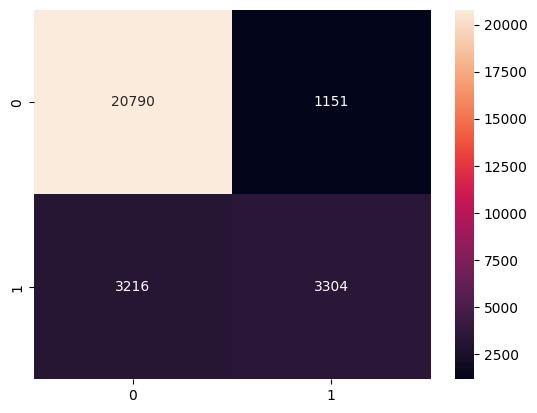

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test,y_test_pred)

sns.heatmap(
    matrix,
    annot=True,
    fmt='d'
)

In [78]:
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

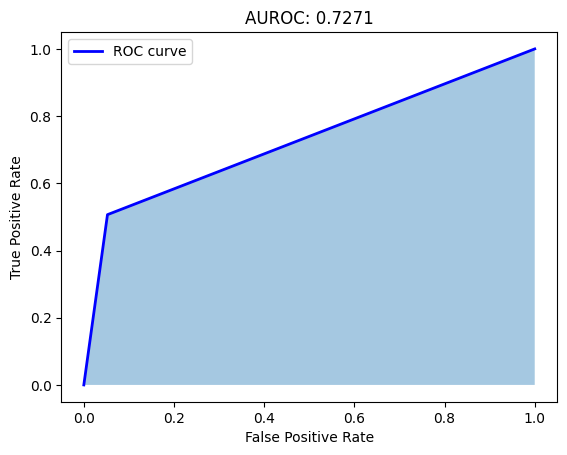

In [81]:
auroc = round(roc_auc_score(y_test, y_test_pred), 4)
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve')
plt.fill_between(fpr, tpr, alpha=0.4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"AUROC: {auroc}")
plt.legend()